In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [ ]:
na_vals = ['NA', 'Missing']
df = pd.read_csv('/home/hp/Desktop/stack_overflow/stack-overflow-developer-survey-2021/survey_results_public.csv', na_values=na_vals)


In [ ]:
df2021 = df[[ # About
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'MentalHealth',
    # Programming
    'Ethnicity',
    'YearsCode',
    'YearsCodePro',
    'NEWStuck',
    # Work
    'Employment',
    'DevType',
    'LanguageHaveWorkedWith'
]]


In [ ]:
df2021.insert(0, 'Serial No', range(1, len(df2021) + 1))

# Display the DataFrame to confirm the addition of the new column
df2021.head()


In [ ]:
df2021.shape

In [ ]:
result_public = df2021

In [ ]:
result_public = result_public[
    (result_public["Age"] == '25-34 years old') |
    (result_public["Age"] == '18-24 years old') |
    (result_public["Age"] == '35-44 years old') |
    (result_public["Age"] == '45-54 years old') |
    (result_public["Age"] == 'Under 18 years old') |
    (result_public["Age"] == '65 years or older') |
    (result_public["Age"] == '55-64 years old') |
    (result_public["Age"] == '25-34 years old')
]

for i in range(81832) :
    if (result_public["Age"].iloc[i] == '25-34 years old') :
        result_public["Age"].iloc[i] = 30
    elif (result_public["Age"].iloc[i] == '18-24 years old') :
        result_public["Age"].iloc[i] = 21
    elif (result_public["Age"].iloc[i] == '35-44 years old') :
        result_public["Age"].iloc[i] = 40
    elif (result_public["Age"].iloc[i] == '45-54 years old') :
        result_public["Age"].iloc[i] = 50
    elif (result_public["Age"].iloc[i] == 'Under 18 years old') :
        result_public["Age"].iloc[i] = 16
    elif (result_public["Age"].iloc[i] == '65 years or older') :
        result_public["Age"].iloc[i] = 65
    elif (result_public["Age"].iloc[i] == '55-64 years old') :
        result_public["Age"].iloc[i] = 58

result_public = result_public.astype({"Age": int})
result_public.head()

In [ ]:
result_public = result_public.dropna()
to_drop = ['Less than 1 year', 'More than 50 years']
result_public = result_public[~result_public['YearsCode'].isin(to_drop)]
result_public = result_public.astype({"YearsCode": int})

to_drop = ['Less than 1 year', 'More than 50 years']
result_public = result_public[~result_public['YearsCodePro'].isin(to_drop)]
result_public = result_public.astype({"YearsCodePro": int})

In [ ]:
result_public["Gender"].unique()

In [ ]:
result_public = result_public[(result_public["Gender"] == "Man") | (result_public["Gender"] == "Woman")]
result_public["Gender"].unique()

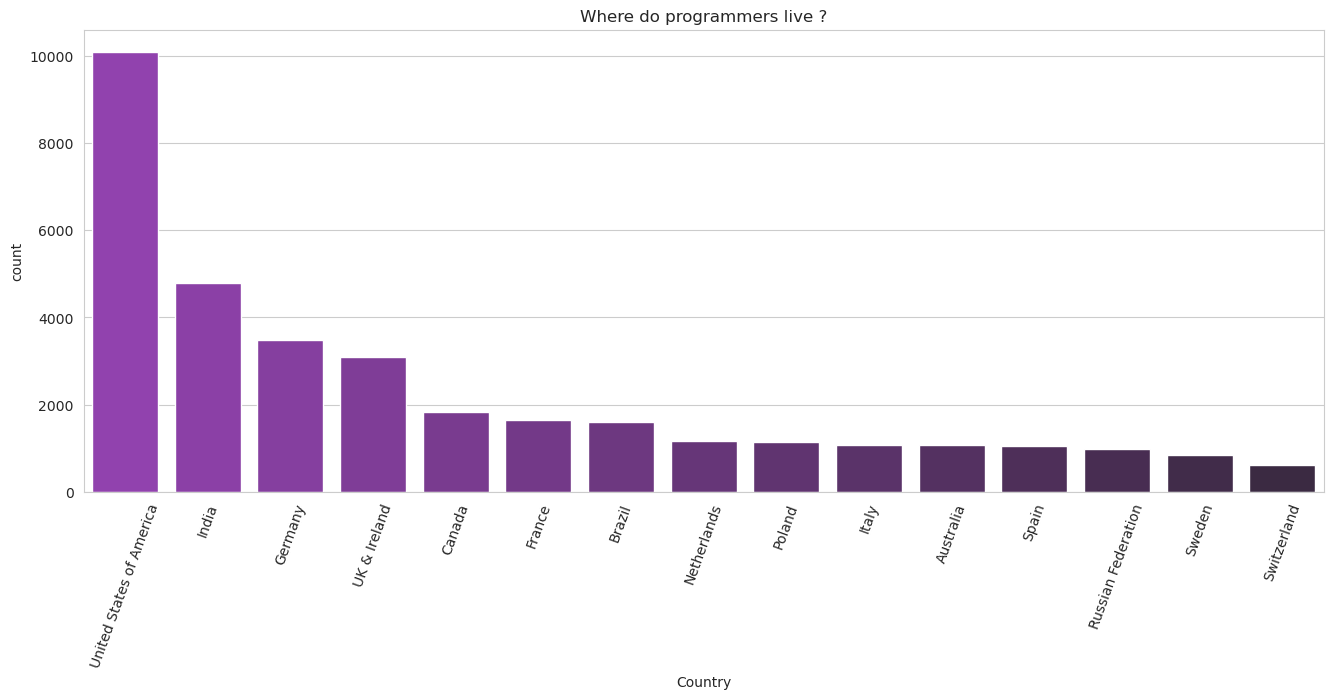

In [30]:
result_public['Country'] = result_public['Country'].replace("United Kingdom of Great Britain and Northern Ireland", 'UK & Ireland')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 70)
plt.title("Where do programmers live ?")
sns.countplot(x = "Country", data = result_public, order = result_public['Country'].value_counts().index[0 : 15], palette = sns.dark_palette("#9a30C0", reverse = True, n_colors = int(15 * 1.2)));

Text(0.5, 0, 'Approx Age')

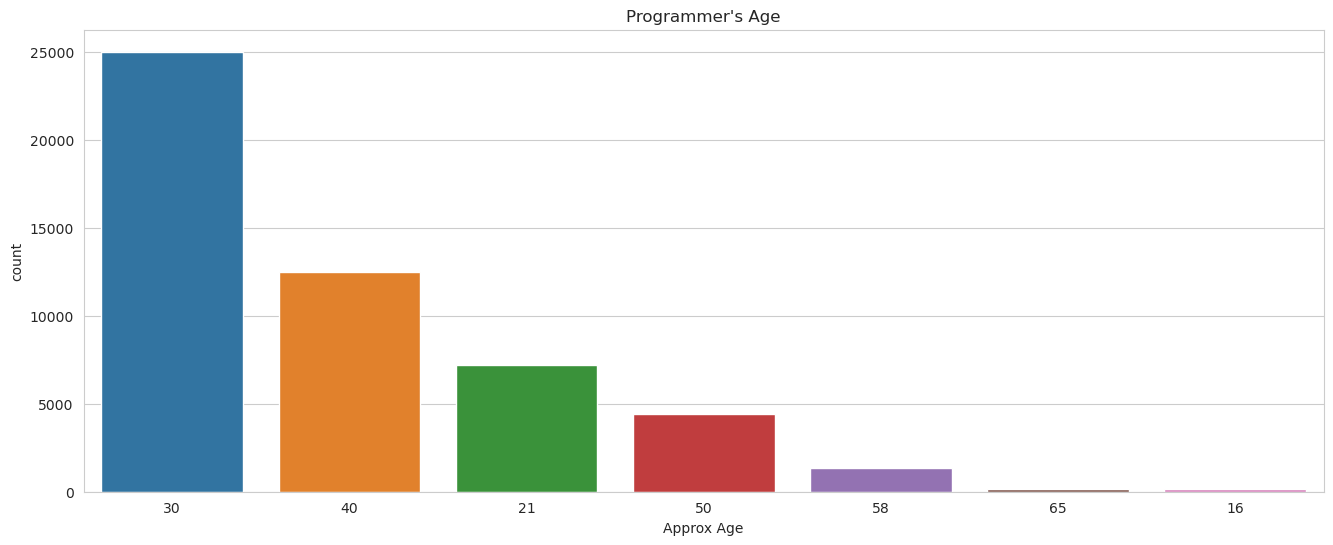

In [31]:
plt.figure(figsize=(16,6))
plt.title("Programmer's Age")
sns.countplot(x = "Age", data = result_public, order = result_public['Age'].value_counts().index[ : ], ).set_xlabel("Approx Age")

<Axes: xlabel='count', ylabel='EdLevel'>

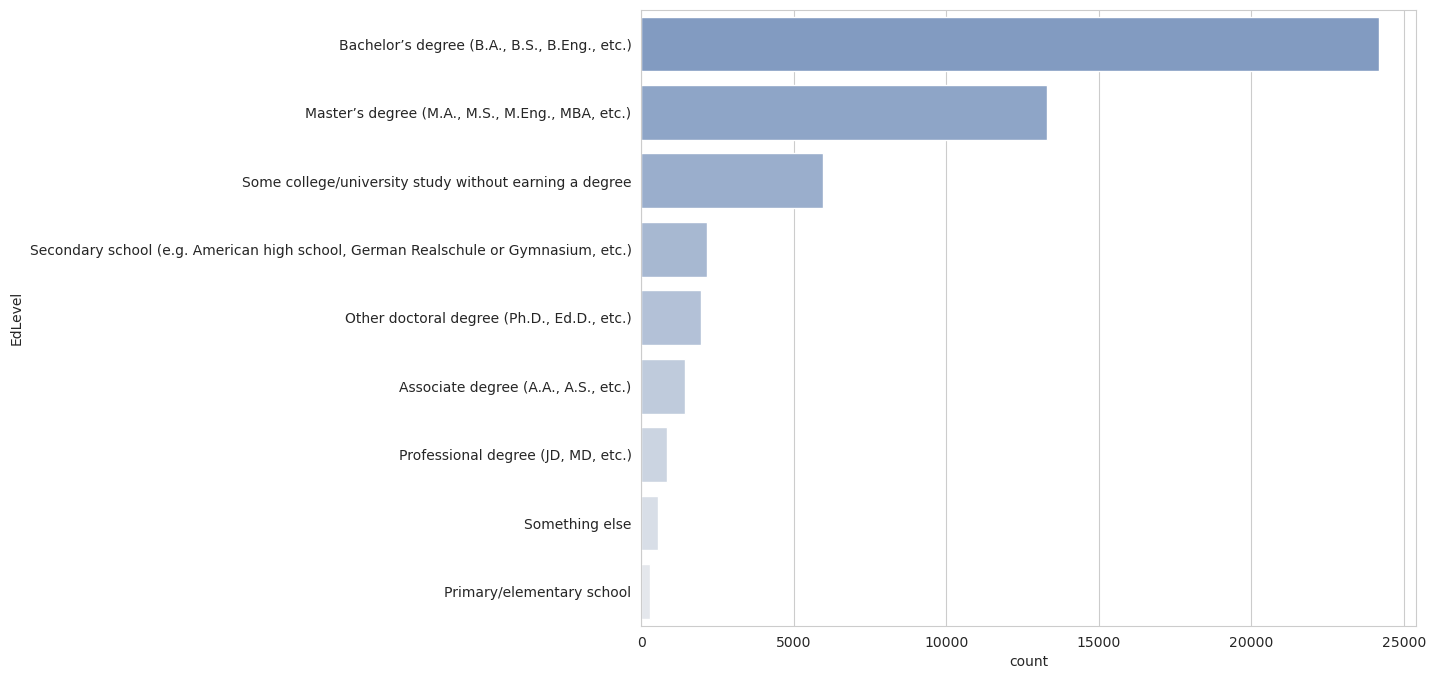

In [32]:
plt.figure(figsize=(10, 8))
sns.countplot(y = result_public["EdLevel"], palette = sns.light_palette("#79C", reverse = True, n_colors = int(len(result_public["EdLevel"].unique()) * 1.2)), order = result_public["EdLevel"].value_counts().index)

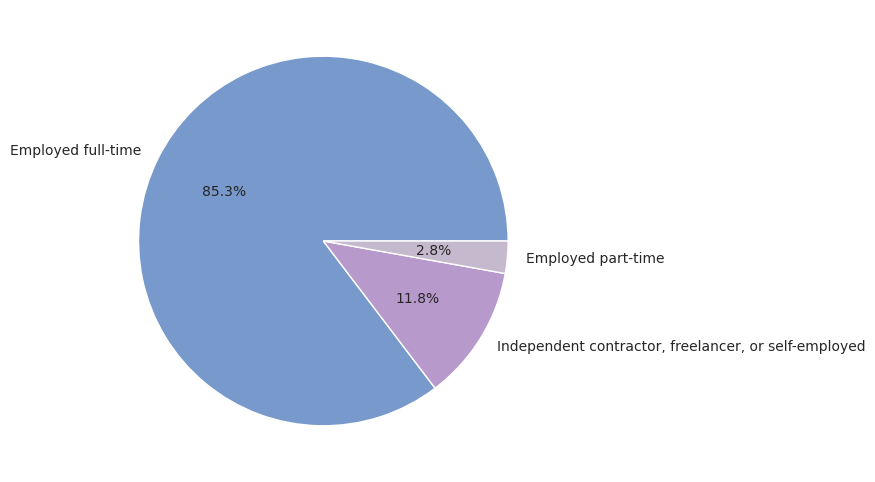

In [33]:
plt.figure(figsize=(14,6))
colors = ["#79C", "#B799CB", "#C5B9CD"]
plt.pie(result_public["Employment"].value_counts(), labels=list(result_public["Employment"].value_counts().index), colors=colors, autopct='%.1f%%');

<Axes: xlabel='count', ylabel='0'>

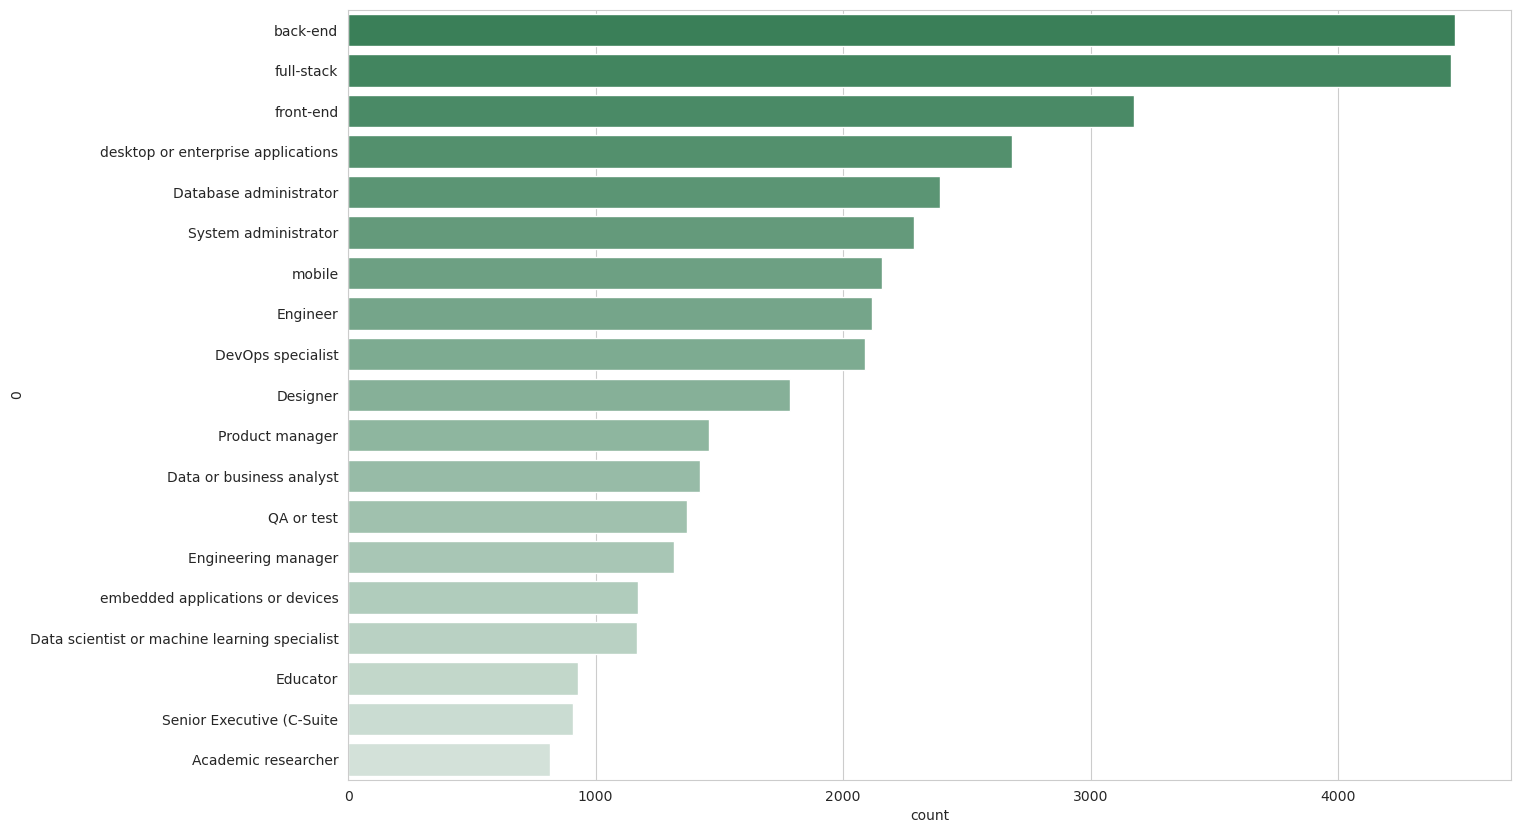

In [34]:
entries = list(result_public["DevType"].unique())
li = []
for i in entries :
    if "," in i :
        lii = i.split(",")
        for j in lii :
            li.append(j.strip())

lf = []
for i in li :
    if ";" in i:
        liif = i.split(";")
        for j in liif :
            lf.append(j.strip())

for i in lf :
    if i == "Developer" :
        lf.pop(lf.index("Developer"))
    elif i == "data" :
        lf.pop(lf.index("data"))
    elif i == "etc.)" :
        lf.pop(lf.index("etc.)"))
        
dev_type_df = pd.DataFrame(lf)
dev_type_df[0].value_counts().head(10)
plt.figure(figsize=(15, 10))
sns.countplot(y=dev_type_df[0], order = dev_type_df[0].value_counts().index[ : 19], palette = sns.light_palette("seagreen", reverse = True, n_colors = int(19 * 1.2)))

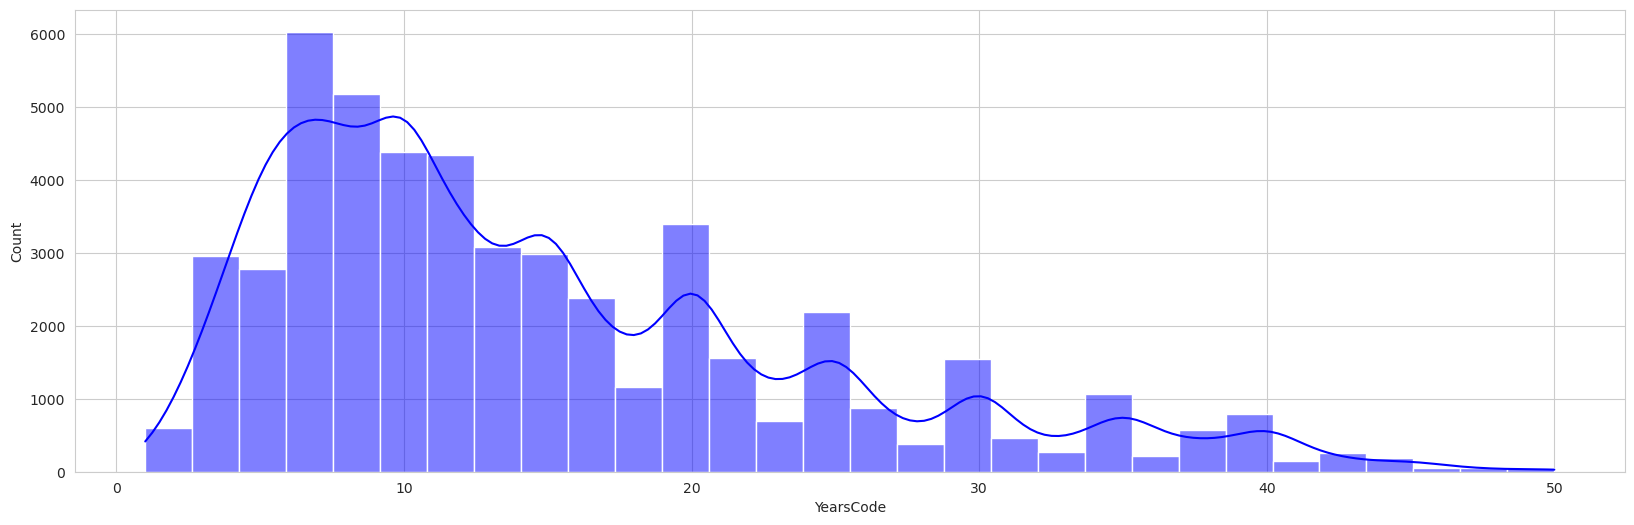

In [35]:
plt.figure(figsize = (20, 6))
sns.histplot(x = result_public["YearsCode"], color = "blue", bins=30, kde=True);

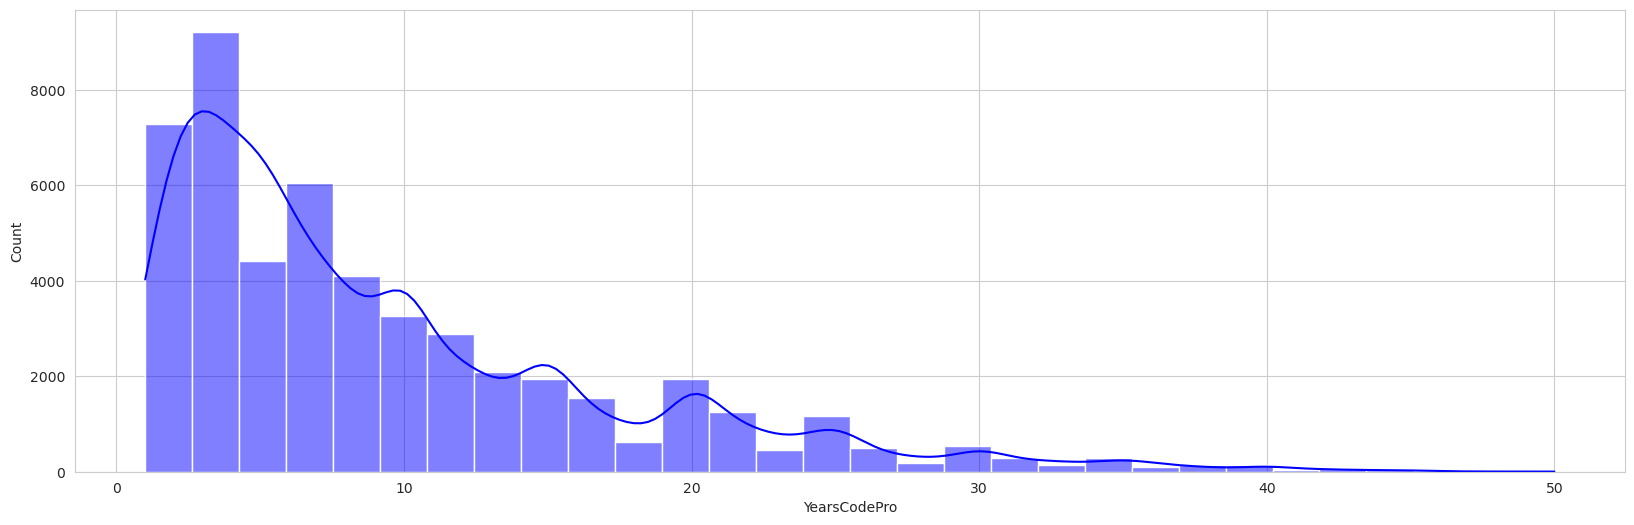

In [36]:
plt.figure(figsize = (20, 6))
sns.histplot(x = result_public["YearsCodePro"], color = "blue", bins=30, kde=True);

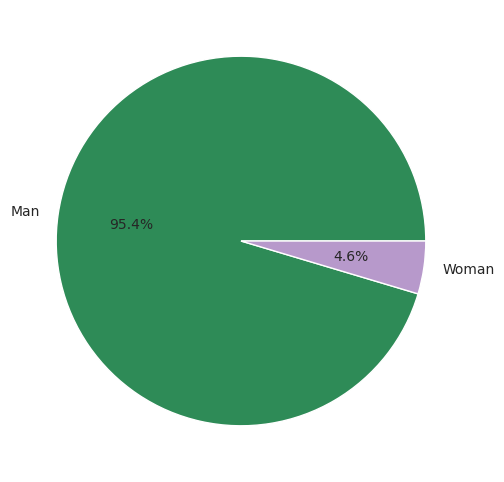

In [37]:
plt.figure(figsize=(14,6))
colors = ["seagreen", "#B799CB"]
plt.pie(result_public["Gender"].value_counts(), labels=list(result_public["Gender"].value_counts().index), colors=colors, autopct='%.1f%%');